In [ ]:
%%capture
!pip install -Iv robin_stocks==1.7.1
!pip install git+https://github.com/rodrigobercini/yfinance.git

In [ ]:
from termcolor import colored
import yfinance as yf
import bs4 as bs
import pickle
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import robin_stocks as r
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  # default='warn'

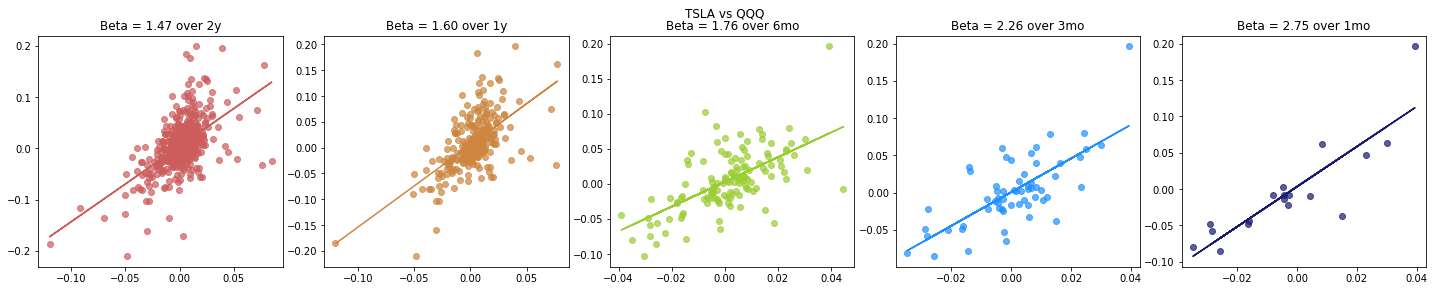

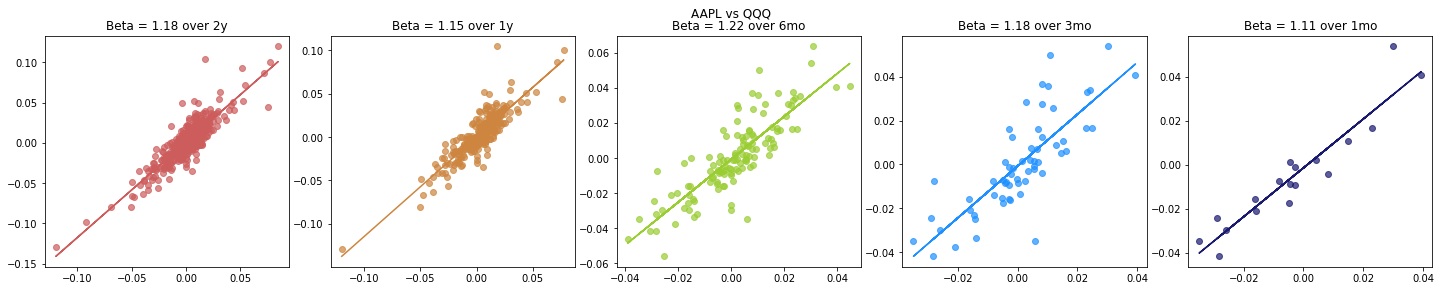

In [ ]:
tickers = ['TSLA','AAPL']
reference = 'QQQ'
periods = ['2y','1y','6mo','3mo','1mo']
close_prices = {}
currStock = yf.Ticker(ticker)
colors = ['indianred','peru','yellowgreen','dodgerblue','midnightblue']
# https://matplotlib.org/stable/gallery/color/named_colors.html




for ticker in tickers:
  fig, ax = plt.subplots(1,len(periods),figsize = (len(periods)*4,4))
  fig.tight_layout(rect=[0, 0.0, 1, 0.95])
  for idx,period in enumerate(periods):

      #reference QQQ or SPY
    currStock = yf.Ticker(reference)
      # get historical market data
    hist = currStock.history(period = period)
      #get current price
    close_prices[reference] = hist['Close'].pct_change().dropna()

      #ticker 
    currStock = yf.Ticker(ticker)
      # get historical market data
    hist = currStock.history(period = period)
      #get current price
    close_prices[ticker] = hist['Close'].pct_change().dropna()


    X = np.expand_dims(np.asarray(close_prices[reference]),-1)
    y = np.expand_dims(np.asarray(close_prices[ticker]),-1)

    m, b = np.polyfit(np.mean(X,-1), y, 1)
    ax[idx].plot(X, m*X + b,color = colors[idx])
    ax[idx].scatter(X,y,color = colors[idx],alpha = 0.7)
    ax[idx].set_title("Beta = {:.2f} over {}".format(m[0],period))
    plt.suptitle('{} vs {}'.format(ticker,reference),y=1)

plt.show()